## Tensorflow를 이용한 XOR gate 이해하기

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'1.15.0'

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [3]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

# XOR-gate
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [4]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 

In [5]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis_ori = tf.sigmoid(tf.matmul(X, W) + b)

* 위의 안되는 네트워크 구조를 수정한 2-2-1 예제. 

In [6]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [7]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost) # 수업시간에 강조한대로 주의 해주세요 !

In [8]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

### Go !

In [9]:
sess = tf.Session()

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
vcost =[]

In [12]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        print(cost1)

0.7965155
0.046591885
0.012478774
0.005403686
0.0027621924
0.001525997
0.0008784204
0.0005174479
0.0003089411
0.00018591186
0.00011239182


Text(0.5, 0, 'epoch')

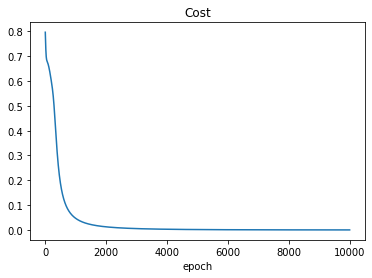

In [13]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [14]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})
print(test1[0][0])

9.656798e-05


In [15]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
  print(i, x_data[i], y_data[i] , '---- predicted : ',test1 )

0 [0. 0.] [0.] ---- predicted :  [[0.00010452]]
1 [0. 1.] [1.] ---- predicted :  [[0.9998167]]
2 [1. 0.] [1.] ---- predicted :  [[0.99993503]]
3 [1. 1.] [0.] ---- predicted :  [[9.656798e-05]]


In [16]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data})
print(acc1)

1.0


In [17]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})
print(test1[0][0])

0.00011725072
